## EDA for context paragraphs (Train)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast
import json

from afinn import Afinn

In [6]:
f = open('data/train-v2.0.json',)

# returns JSON object as  
# a dictionary 
data = json.load(f)
df = pd.DataFrame.from_dict(data)

In [7]:
contextID = 1
questionAnswerData= pd.DataFrame()
contextData = pd.DataFrame()

## For training set
for topic in data['data']:
    for paras in topic["paragraphs"]:
        
        questions = pd.DataFrame(paras["qas"])
        questions["contextID"] = contextID
        merging = [questionAnswerData, questions]
        questionAnswerData = pd.concat(merging)
        
        context = pd.Series([paras["context"]],name="context")
        context = context.to_frame()
        context["contextID"] = contextID
        merging = [contextData, context]
        contextData = pd.concat(merging)
        
        contextID = contextID +1

## Number of topics

In [13]:
len(data['data'])

442

### Number of Context Paragraphs

In [10]:
contextData.count()

context      19035
contextID    19035
dtype: int64

In [11]:
contextData.head()

,context,contextID
0,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,1
0,Following the disbandment of Destiny's Child i...,2
0,"A self-described ""modern-day feminist"", Beyonc...",3
0,"Beyoncé Giselle Knowles was born in Houston, T...",4
0,Beyoncé attended St. Mary's Elementary School ...,5


### Number of Questions and Answers

In [15]:
questionAnswerData.count()


question             130319
id                   130319
answers              130319
is_impossible        130319
contextID            130319
plausible_answers     43498
dtype: int64

### Context Length

In [16]:
contextData["Length"] = contextData["context"].apply(lambda x : len(x.split()))

No handles with labels found to put in legend.


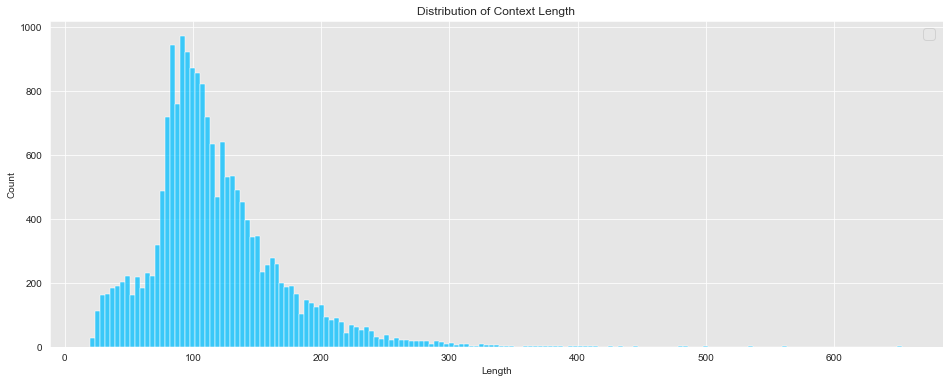

In [18]:
plt.figure(figsize=(16, 6))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.histplot(contextData["Length"], stat = "count", color='deepskyblue')
plt.title("Distribution of Context Length")
plt.legend(fontsize = 15)

### Basic Sentiment Analysis using AFINN

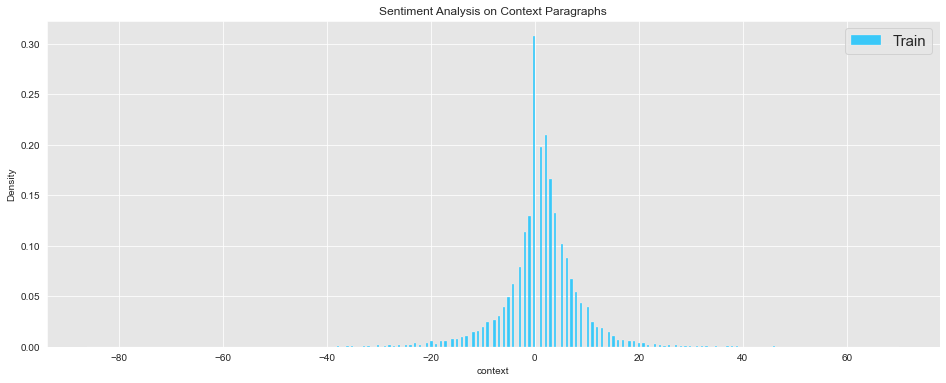

In [19]:
afinn = Afinn()
afinn_scores = contextData["context"].apply(lambda x: afinn.score(x))

plt.figure(figsize=(16, 6))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.histplot(afinn_scores, stat = "density", color='deepskyblue', label = "Train")
plt.title("Sentiment Analysis on Context Paragraphs")
plt.legend(fontsize = 15)

### Length of each Question

Text(0.5, 0, 'Length of Question (WordCount)')

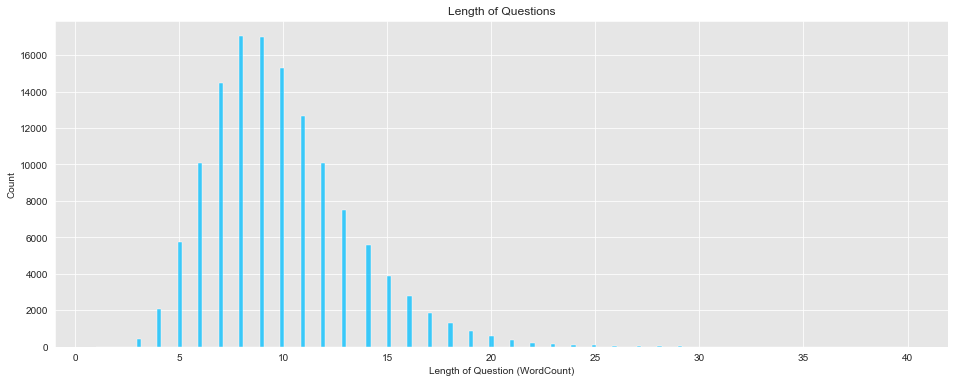

In [22]:
questionAnswerData["Length"] = questionAnswerData["question"].apply(lambda x : len(x.split()))

plt.figure(figsize=(16, 6))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.histplot(questionAnswerData["Length"], stat = "count", color='deepskyblue', label = "Train")
plt.title ("Length of Questions")
plt.xlabel('Length of Question (WordCount)')

### Length of Each Answers

In [32]:
def extractAnsLength(x):
    # x = ast.literal_eval(x)
    return len(x['text'].split())

In [33]:
answersLength = questionAnswerData.apply(axis=1, 
    func = (lambda x: extractAnsLength(x['plausible_answers'][0]) if x['is_impossible'] else extractAnsLength(x["answers"][0])))

Text(0, 0.5, 'Number of Answers')

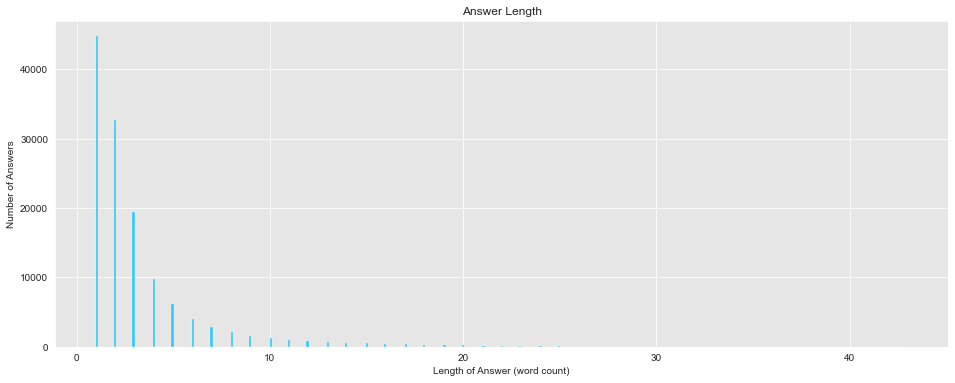

In [34]:
plt.figure(figsize=(16, 6))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.histplot(answersLength, stat = "count", color='deepskyblue')
plt.title("Answer Length")
plt.xlabel("Length of Answer (word count)")
plt.ylabel("Number of Answers")

In [36]:
questionAnswerData.describe()

,contextID,Length
count,130319.000000,130319.000000
mean,9851.965147,9.893822
std,5366.233464,3.418829
min,1.000000,1.000000
25%,5632.000000,7.000000
50%,9969.000000,9.000000
75%,14463.000000,12.000000
max,19035.000000,40.000000


### Ratio between "Possible" answers and "Impossible" answers

Text(0.5, 1.0, 'Proportion of Answers')

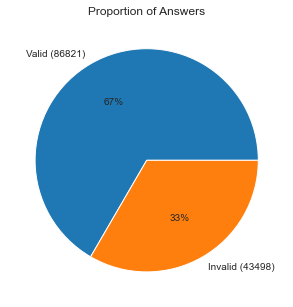

In [38]:
df_impossible = len(questionAnswerData[questionAnswerData['is_impossible']])
df_possible = len(questionAnswerData) - df_impossible

sizes = [(df_possible) , (df_impossible)]

plt.figure(figsize=(5, 8))
plt.pie(sizes, autopct='%1.0f%%' , labels= ["Valid ({0})".format(df_possible),"Invalid ({0})".format(df_impossible)])
plt.title("Proportion of Answers")